# Finding Hubble's Law 

In this introduction we want to use Hubble's original observations in `hubble_velocities.csv` to measure the expansion of the universe.
We will load the data, do a linear regresison and plot our findings.

First we have to import the packages we would like to use
* `pandas` is a library implementing useful data analysis classes.
* `numpy` is a standard python library allowing us to do operations on arrays fo data
* `matplotlib.pyplot` is the standard library for plotting data.
* `scipy.optimize` has some useful implementations for optimisation problems

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

We can use `pandas` to read our data. A useful funtion is `pandas.read_csv()`: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [5]:
data =  # insert your code to read the data
data

,distance,velocity
0,0.023802,281.984967
1,0.023802,161.849353
2,0.205027,-132.690046
3,0.267683,-212.484096
4,0.274692,-74.053305
5,0.342659,-209.566028
6,0.448409,202.236694
7,0.678242,195.229692
8,0.789537,293.533668
9,0.890371,642.559828


Let's have a look at the data in plot with the distance at on the x-axis and the velocities on the y-axis.
Having created a `Figure` and `Axes` instance with `pyplot.subplots()`, you can use the `Axes.scatter()` function to draw your datapoints: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html

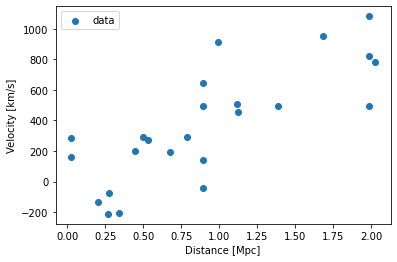

In [26]:
fig, ax = plt.subplots()
ax.scatter()  # insert the right arguments to plot the data
ax.set_xlabel('Distance [Mpc]')
ax.set_ylabel('Velocity [km/s]')
ax.legend()
plt.show()
plt.close()

We can now try and repeat Hubble's work and fit a straight line to our data. We want to fit a function that takes the distance $x$ and gives the velocity $y$:
$$f_{fit}(x) = a \cdot x + b$$

In [17]:
def fitfunc(x, a, b):
    return a*x + b

We will use scipy to determine the best fit values for $a$ and $b$. A versatile funtion to do this is `scipy.optimize.curve_fit()`: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [24]:
popt, pcov = scipy.optimize.curve_fit()  # insert the right arguments to fit a line to the data
print(f"The optimal parameters are:\n a = {popt[0]}\n b = {popt[1]}")

The optimal parameters are:
 a = 450.507246101519
 b = -44.31848826963398


Let's plot this together with the data. To plot our fitted function we have to create some synthetic values for the x-axis. If we want them evenly spaced, `numpy.linspace()` is a good way to do this: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html.
Plotting a line when your data is ordered is commonly done with `Axes.plot()`: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html

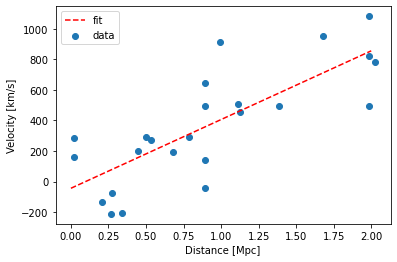

In [28]:
x_fitplot =  # insert your code to generate an array of x values
y_fitplot =  # insert your code to generate the corresponding y values

fig, ax = plt.subplots()
ax.scatter()  # insert the right arguments to plot the data
ax.plot()     # insert the right arguments to plot the fit
ax.set_xlabel('Distance [Mpc]')
ax.set_ylabel('Velocity [km/s]')
ax.legend()
plt.show()
plt.close()

Now we can compare Hubble's findings to recent observations. The `astropy` module features a submodule called `cosmology` that implements cosmological models and useful functions. Among others it has the most recent results from the Planck satelite (https://arxiv.org/abs/1807.06209)

In [3]:
from astropy.cosmology import Planck18

A quick look at the measured value for $H_0$ tells us that Hubble was a bit off.

In [4]:
Planck18.H0

<Quantity 67.66 km / (Mpc s)>

Sidenote in case you were wondering why this number appears so beautifully with the right units: `astropy` has a sub module `astropy.units`. If you assign a unit (e.g. metres) to a value you can easily convert it into derived units (e.g. centimetres) and also use it in calculations (e.g. $1\,m / 1\,s = 1\, m/s$)

In [5]:
from astropy import units as u

In [6]:
length = 1 * u.m
time = 1 * u.s
velocity = length / time
velocity

<Quantity 1. m / s>

In [7]:
length.to('Mpc')

<Quantity 3.24077929e-23 Mpc>